<a href="https://colab.research.google.com/github/lkostenko/python_da_homeworks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [1]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.2 MB/s eta 0:00:00


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

In [6]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [12]:
df = pd.read_sql(f'SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS emp_num FROM employees GROUP BY YEAR(hire_date) ORDER BY hire_year', con)
df

<ipython-input-12-48135a628761>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS emp_num FROM employees GROUP BY YEAR(hire_date) ORDER BY hire_year', con)


,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

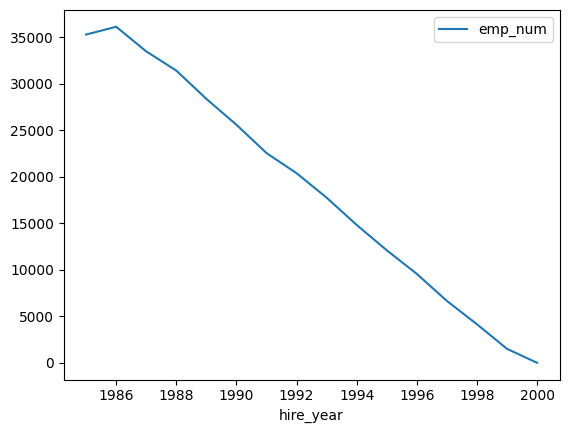

In [19]:
df.set_index('hire_year', inplace=True)
df.plot();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [20]:
pd.read_sql(f'show tables', con)

<ipython-input-20-527b3dddefcb>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(f'show tables', con)


,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,salaries
7,titles


In [27]:
pd.read_sql(f'show columns from titles', con)

<ipython-input-27-53291e1411e2>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(f'show columns from titles', con)


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,title,varchar(50),NO,PRI,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,YES,,None,


In [36]:
pd.read_sql(f'select *, TIMESTAMPDIFF(YEAR, from_date, to_date) as duration from titles where title = "Engineer" and  to_date != "9999-01-01" limit 5', con)

<ipython-input-36-307df6c966d5>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(f'select *, TIMESTAMPDIFF(YEAR, from_date, to_date) as duration from titles where title = "Engineer" and  to_date != "9999-01-01" limit 5', con)


,emp_no,title,from_date,to_date,duration
0,10004,Engineer,1986-12-01,1995-12-01,9
1,10009,Engineer,1990-02-18,1995-02-18,5
2,10012,Engineer,1992-12-18,2000-12-18,8
3,10018,Engineer,1987-04-03,1995-04-03,8
4,10026,Engineer,1995-03-20,2001-03-19,5


In [42]:
df_years = pd.read_sql(f'select TIMESTAMPDIFF(YEAR, from_date, to_date) as duration, from_date, to_date from titles where title = "Engineer" and  to_date != "9999-01-01"', con)
df_years

<ipython-input-42-17c556c3598b>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(f'select TIMESTAMPDIFF(YEAR, from_date, to_date) as duration, from_date, to_date from titles where title = "Engineer" and  to_date != "9999-01-01"', con)


,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

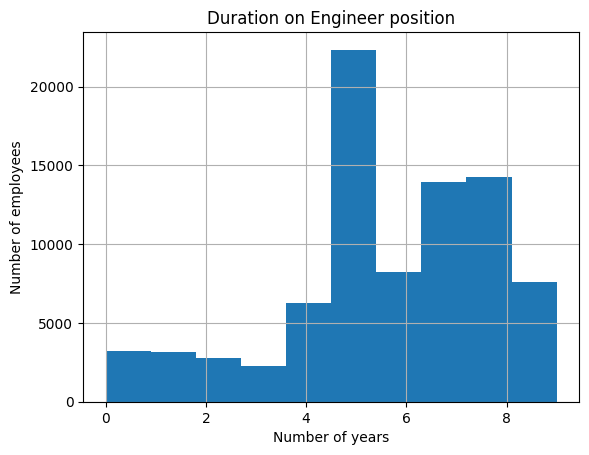

In [46]:
df_years.duration.hist()
plt.xlabel('Number of years')
plt.ylabel('Number of employees')
plt.title('Duration on Engineer position');


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [47]:
con.close()